Let's attempt to replicate the Minard's Grammar of Graphics in this assignment. We are going to reproduce the Charles Minard visualization of Napoleon's march to Moscow. I am on google colab using R. 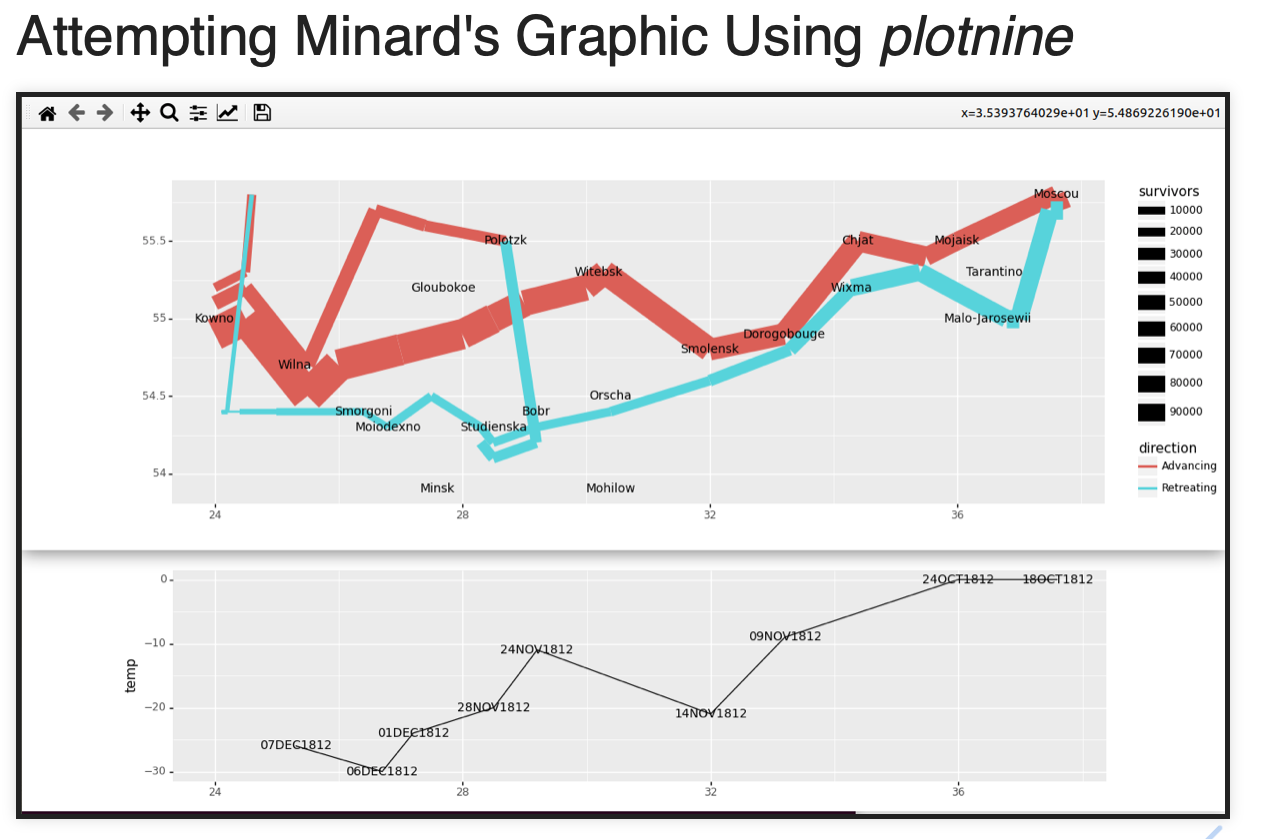

In [ ]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Original version of code

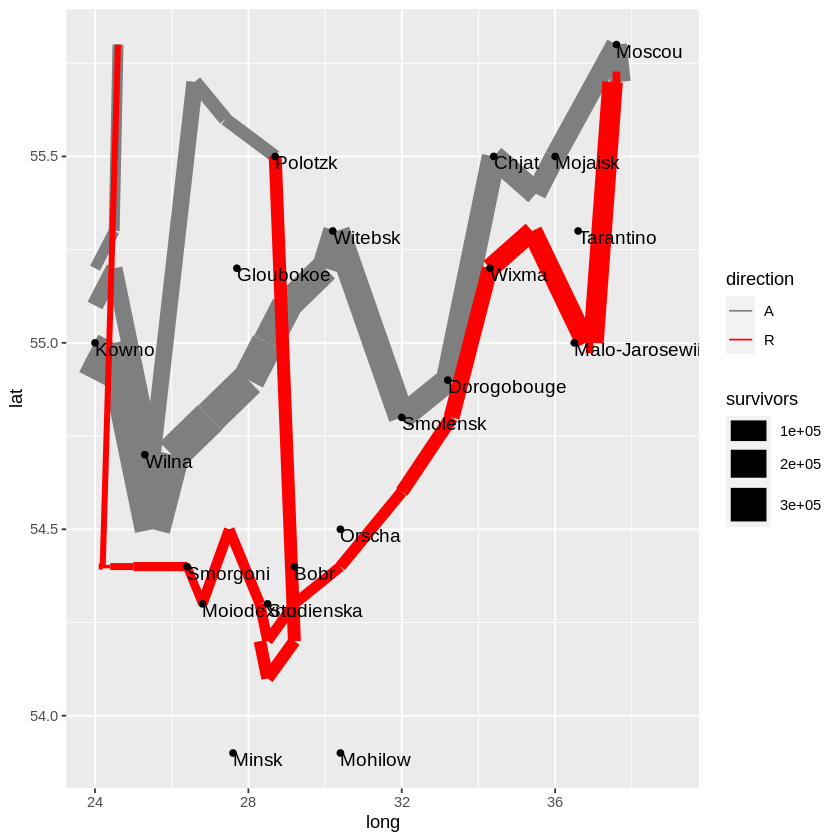

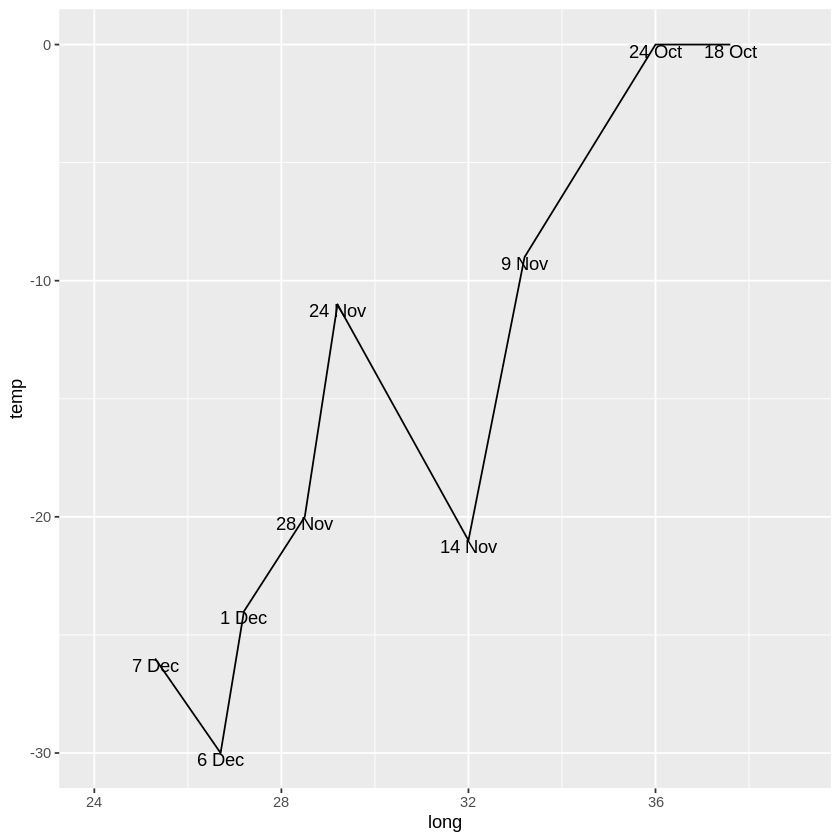

In [ ]:
troops <- read.table("troops.txt", header=T)
cities <- read.table("cities.txt", header=T)
temps <- read.table("temps.txt", header=T)
temps$date <- as.Date(strptime(temps$date,"%d%b%Y"))

# library(maps)
# borders <- data.frame(map("world", xlim=c(10,50), ylim=c(40, 80), plot=F)[c("x","y")])

xlim <- scale_x_continuous(limits = c(24, 39))

ggplot(cities, aes(x = long, y = lat)) +
geom_path(
  aes(size = survivors, colour = direction, group = group),
  data=troops
) +
geom_point() +
geom_text(aes(label = city), hjust=0, vjust=1, size=4) +
scale_size(range = c(1, 10)) +
scale_colour_manual(values = c("grey50","red")) +
xlim




ggsave(file = "march.pdf", width=16, height=4)

qplot(long, temp, data=temps, geom="line") +
geom_text(aes(label = paste(day, month)), vjust=1) + xlim

ggsave(file = "temps.pdf", width=16, height=4)

Modified version to make it look exactly like it was given in the lectures

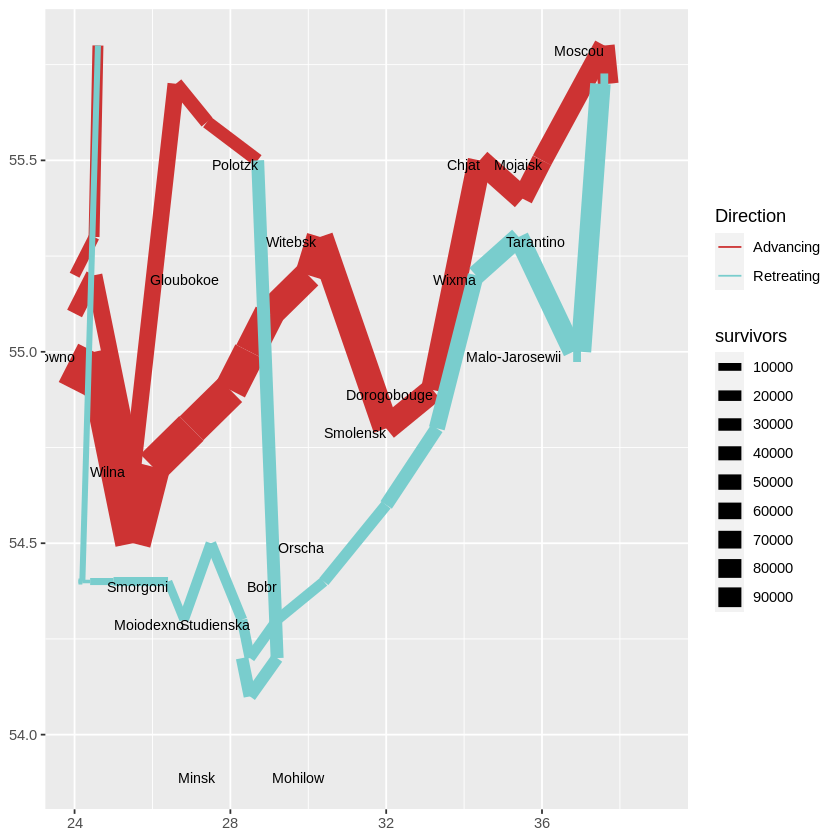

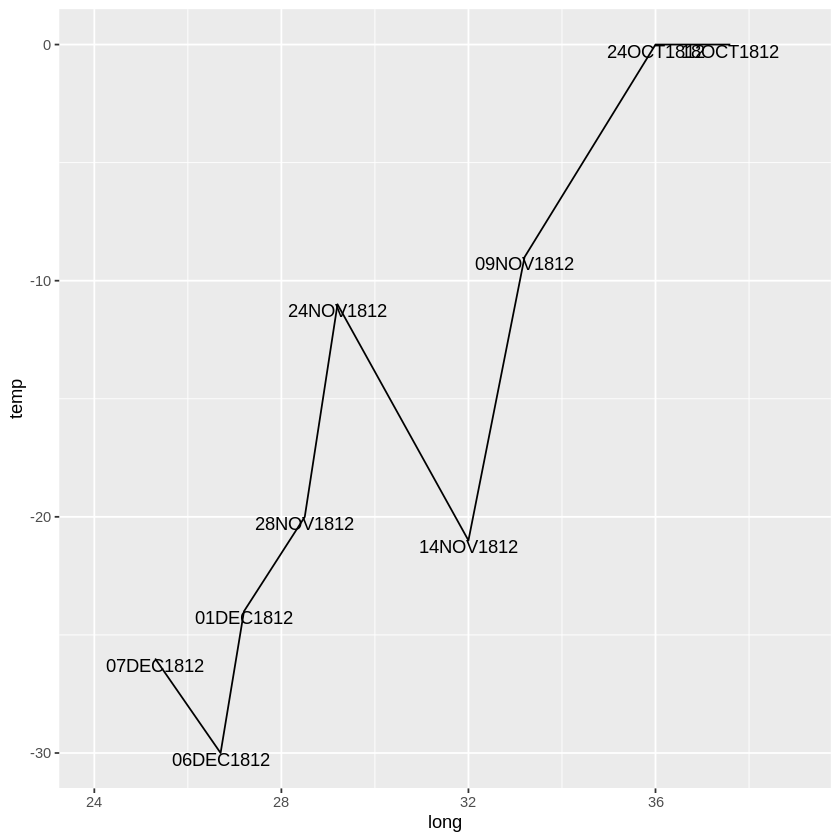

In [ ]:
troops <- read.table("troops.txt", header=T)
cities <- read.table("cities.txt", header=T)
temps <- read.table("temps.txt", header=T)
# temps$date <- as.Date(strptime(temps$date,"%d%b%Y"))

# I commented this line so the temps.pdf can display like 24OCT1812, the previous code would plot is just as OCT 24,
# and I wanted it to look exactly the same as the one that was shown to us in lecture

#library(maps)
#borders <- data.frame(map("world", xlim=c(10,50), ylim=c(40, 80), plot=F)[c("x","y")])

xlim <- scale_x_continuous(limits = c(24, 39))

ggplot(cities, aes(x = long, y = lat)) +
geom_path(
  aes(size = survivors, colour = direction, group = group),
  data=troops
) +
geom_point(color = "transparent") + # So the point will be invisible, just the city names in the plot
geom_text(aes(label = city), hjust=1, vjust=1, size=3) +  # setting the text size for the city names
scale_size(range = c(1, 10), breaks = seq(0, max(90000), by = 10000)) + #changed "to" to "range", since it seemed like ggplot uses different arg name, and added break
scale_colour_manual(values = c("brown3", "darkslategray3"), # I can't exactly get the color right between brown 2,3 and cyan or cadetblue 2,3 or darkslategray 2,3 UGH
                      name = "Direction",  # Change legend title
                      labels = c("Advancing", "Retreating")) +  # Change legend labels
theme(axis.title.x = element_blank(),  # It also seemed like in original one, the march plot had no axis titles. Remove x-axis label
        axis.title.y = element_blank()) + # Remove y-axis label


xlim




ggsave(file = "march.pdf", width=16, height=4)

qplot(long, temp, data=temps, geom="line") +
geom_text(aes(label = paste(date)), vjust=1) + xlim

ggsave(file = "temps.pdf", width=14, height=3.5) # shrinking the width, because the march pdf graph part looks smaller due to legends, also the height seemd smaller

In [ ]:
temps$date

[1] "18OCT1812" "24OCT1812" "09NOV1812" "14NOV1812" "24NOV1812" "28NOV1812"
[7] "01DEC1812" "06DEC1812" "07DEC1812"

In [ ]:
temps$date <- as.Date(strptime(temps$date,"%d%b%Y"))
temps$date

[1] "1812-10-18" "1812-10-24" "1812-11-09" "1812-11-14" "1812-11-24"
[6] "1812-11-28" "1812-12-01" "1812-12-06" "1812-12-07"

Now, the google colab output shrinks the outputs into their small window, so it is not the real output. You have to download the pdfs that it creates and then check it over there to see the actual figure size that I edited. Whatever I set as figure size here, it will all look like those square looking ones in my window. Download the pdfs! I am attaching the screenshot of the two pdfs I got here just cause.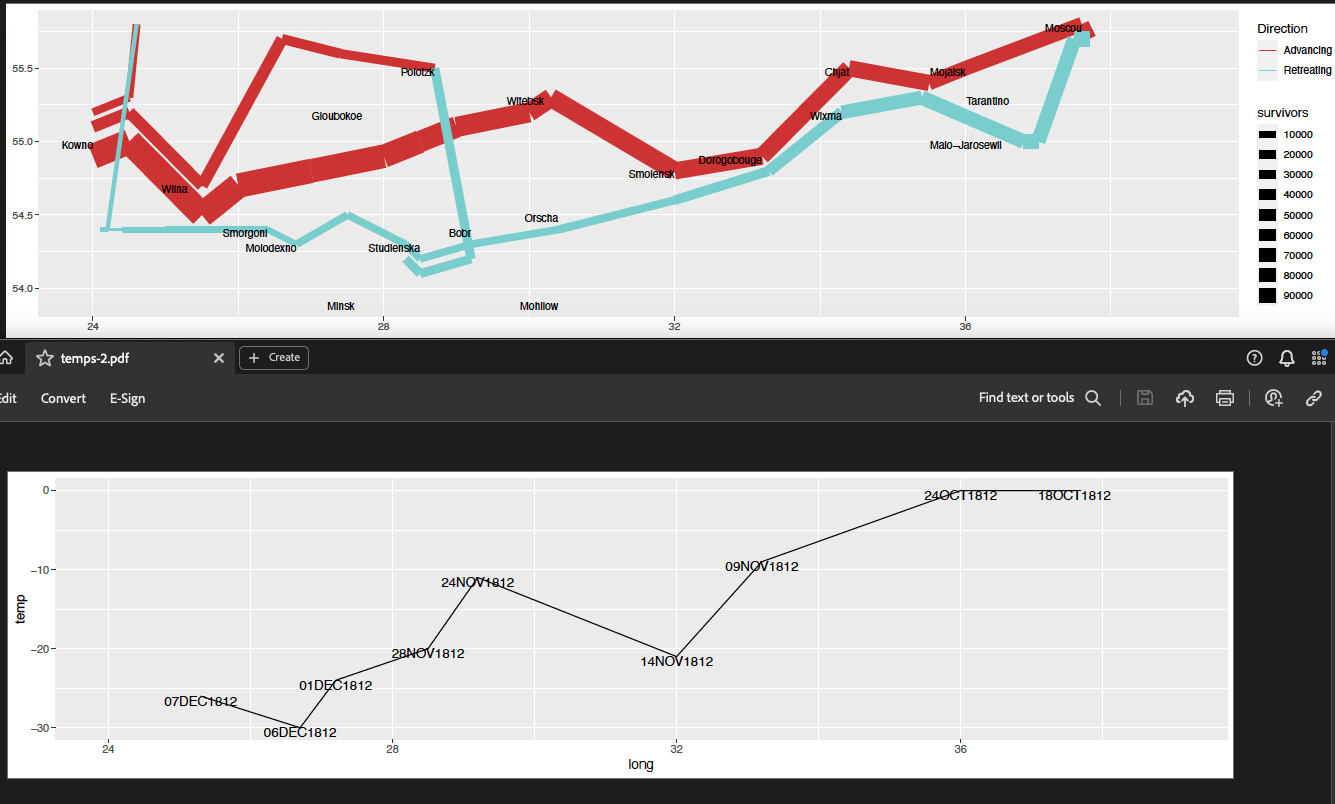